# Keras

## Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

### Generate train samples/labels

In [2]:
train_labels = []
train_samples = []

Example data:

- An experimental drug tested in individuals from ages 13 to 100 in a clinical trial.
- The trial had 2100 participants. Half were uder 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

We are **generating** our data sets:

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

### Summary of our data:

In [4]:
[print(j,train_labels[i]) for i, j in enumerate(train_samples)]

37 1
91 0
50 1
76 0
23 1
98 0
16 1
86 0
30 1
78 0
40 1
67 0
24 1
99 0
34 1
92 0
25 1
88 0
63 1
94 0
17 1
75 0
54 1
96 0
48 1
70 0
60 1
81 0
47 1
91 0
23 1
100 0
22 1
83 0
43 1
70 0
43 1
76 0
33 1
93 0
59 1
90 0
25 1
89 0
31 1
81 0
59 1
98 0
43 1
73 0
62 1
97 0
14 1
70 0
50 1
93 0
36 1
81 0
32 1
95 0
15 1
99 0
61 1
98 0
47 1
99 0
25 1
73 0
31 1
94 0
15 1
85 0
62 1
91 0
60 1
97 0
35 1
77 0
64 1
89 0
37 1
94 0
52 1
97 0
43 1
74 0
49 1
99 0
29 1
85 0
60 1
97 0
58 1
97 0
44 1
79 0
60 1
83 0
14 1
90 0
61 0
99 1
55 0
82 1
41 0
96 1
22 0
66 1
25 0
66 1
50 0
83 1
55 0
96 1
14 0
89 1
22 0
87 1
45 0
96 1
64 0
99 1
59 0
96 1
46 0
72 1
18 0
96 1
13 0
96 1
41 0
68 1
32 0
88 1
27 0
75 1
29 0
81 1
21 0
83 1
19 0
73 1
37 0
83 1
18 0
68 1
34 0
68 1
19 0
88 1
19 0
92 1
46 0
76 1
31 0
88 1
32 0
71 1
43 0
81 1
43 0
82 1
39 0
70 1
19 0
76 1
64 0
67 1
56 0
98 1
30 0
87 1
38 0
78 1
62 0
82 1
35 0
75 1
39 0
67 1
25 0
90 1
28 0
71 1
24 0
78 1
48 0
79 1
37 0
73 1
34 0
73 1
19 0
92 1
31 0
90 1
37 0
88 1
47 0
87 1

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

### Data Process

Next, we **process** our data: (to be in the format required by the `fit()` function which `numpy array`.)

The shuffle stage is performed to get rid of any imposed order from the data generation process!

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

### Normalization

change the range of features (ages) from 0-100 to 0-1

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

The reshape is a foramlity, since `fit()` do not accept 1-dimensional data!

In [7]:
for i in scaled_train_samples:
    print(i)

[0.20689655]
[0.96551724]
[0.55172414]
[0.73563218]
[0.35632184]
[0.11494253]
[0.27586207]
[0.56321839]
[0.63218391]
[0.50574713]
[0.85057471]
[0.3908046]
[0.83908046]
[0.4137931]
[0.75862069]
[0.65517241]
[0.62068966]
[0.70114943]
[0.13793103]
[1.]
[0.70114943]
[0.82758621]
[0.70114943]
[0.91954023]
[0.05747126]
[0.85057471]
[0.43678161]
[0.10344828]
[0.4137931]
[0.64367816]
[0.11494253]
[0.3908046]
[0.34482759]
[0.64367816]
[0.91954023]
[0.57471264]
[1.]
[0.05747126]
[0.48275862]
[0.8045977]
[0.85057471]
[0.6091954]
[0.05747126]
[0.90804598]
[0.11494253]
[0.42528736]
[0.11494253]
[0.87356322]
[0.14942529]
[0.22988506]
[0.13793103]
[0.]
[0.10344828]
[0.59770115]
[0.40229885]
[0.26436782]
[0.85057471]
[0.70114943]
[0.56321839]
[0.59770115]
[0.81609195]
[0.94252874]
[0.42528736]
[0.83908046]
[0.20689655]
[0.82758621]
[0.22988506]
[0.75862069]
[0.44827586]
[0.8045977]
[0.95402299]
[0.4137931]
[0.94252874]
[0.20689655]
[0.25287356]
[0.98850575]
[0.04597701]
[0.09195402]
[0.79310345]
[0.14

[0.10344828]
[0.6091954]
[0.7816092]
[0.63218391]
[0.85057471]
[0.04597701]
[0.17241379]
[0.1954023]
[0.03448276]
[0.73563218]
[1.]
[0.4137931]
[0.96551724]
[0.06896552]
[0.56321839]
[0.88505747]
[0.70114943]
[0.56321839]
[0.02298851]
[0.33333333]
[0.03448276]
[0.70114943]
[0.95402299]
[1.]
[0.22988506]
[0.93103448]
[0.77011494]
[0.70114943]
[0.31034483]
[0.47126437]
[0.68965517]
[0.63218391]
[0.97701149]
[1.]
[0.10344828]
[0.89655172]
[0.89655172]
[0.94252874]
[0.09195402]
[0.82758621]
[0.05747126]
[0.96551724]
[0.52873563]
[0.25287356]
[0.20689655]
[0.8045977]
[1.]
[0.42528736]
[0.44827586]
[0.22988506]
[0.22988506]
[0.32183908]
[0.94252874]
[0.62068966]
[0.79310345]
[0.77011494]
[0.08045977]
[0.87356322]
[0.63218391]
[0.81609195]
[0.55172414]
[0.25287356]
[0.12643678]
[0.71264368]
[0.55172414]
[0.89655172]
[0.44827586]
[0.85057471]
[0.40229885]
[0.68965517]
[1.]
[0.96551724]
[0.26436782]
[0.79310345]
[0.31034483]
[0.22988506]
[0.95402299]
[0.91954023]
[0.59770115]
[0.71264368]
[0.02

[0.31034483]
[0.09195402]
[0.06896552]
[0.06896552]
[0.82758621]
[0.09195402]
[0.72413793]
[0.66666667]
[0.25287356]
[0.20689655]
[0.66666667]
[0.29885057]
[0.70114943]
[0.59770115]
[0.66666667]
[0.27586207]
[0.37931034]
[0.35632184]
[0.89655172]
[1.]
[0.34482759]
[0.28735632]
[0.65517241]
[0.04597701]
[0.50574713]
[0.73563218]
[0.1954023]
[0.16091954]
[0.95402299]
[0.13793103]
[0.50574713]
[0.2183908]
[0.27586207]
[0.42528736]
[0.24137931]
[0.29885057]
[0.37931034]
[0.43678161]
[0.24137931]
[0.05747126]
[0.79310345]
[0.40229885]
[0.42528736]
[0.98850575]
[0.4137931]
[0.01149425]
[0.31034483]
[0.8045977]
[0.7816092]
[0.72413793]
[0.36781609]
[0.59770115]
[0.48275862]
[0.06896552]
[0.68965517]
[0.3908046]
[0.08045977]
[0.47126437]
[0.67816092]
[0.18390805]
[0.64367816]
[0.34482759]
[0.81609195]
[0.94252874]
[0.27586207]
[0.40229885]
[0.28735632]
[0.34482759]
[0.85057471]
[0.27586207]
[0.5862069]
[0.88505747]
[0.81609195]
[0.79310345]
[0.82758621]
[0.83908046]
[0.27586207]
[0.65517241]
[

## Simple `tf.keras` Sequential Model

Now we create artificial neural network for which we can train on this data.

![sequential](./images/sequential.png)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

If you are running the code on a GPU run this to make sure that tensorflow has identified you GPU:

In [9]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Build the model

In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

#### Note:

1. The first dense layer is not the input layer. The input layer is the input to this layer which is in this case, has the shape `input_shape(1,)`.

2. The last dense layer is the output layer, which corresponds to the two possible scenarios of having side effect or not.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

`verbose` in the following line refers to output message, which can be set to 0, 1, 2. 

### Train the model

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.6861 - accuracy: 0.6067
Epoch 2/30
210/210 - 0s - loss: 0.6497 - accuracy: 0.6752
Epoch 3/30
210/210 - 0s - loss: 0.6131 - accuracy: 0.7390
Epoch 4/30
210/210 - 0s - loss: 0.5700 - accuracy: 0.7971
Epoch 5/30
210/210 - 0s - loss: 0.5268 - accuracy: 0.8376
Epoch 6/30
210/210 - 0s - loss: 0.4864 - accuracy: 0.8552
Epoch 7/30
210/210 - 0s - loss: 0.4492 - accuracy: 0.8776
Epoch 8/30
210/210 - 0s - loss: 0.4161 - accuracy: 0.8881
Epoch 9/30
210/210 - 0s - loss: 0.3881 - accuracy: 0.8995
Epoch 10/30
210/210 - 0s - loss: 0.3650 - accuracy: 0.9086
Epoch 11/30
210/210 - 0s - loss: 0.3459 - accuracy: 0.9071
Epoch 12/30
210/210 - 0s - loss: 0.3304 - accuracy: 0.9171
Epoch 13/30
210/210 - 0s - loss: 0.3182 - accuracy: 0.9138
Epoch 14/30
210/210 - 0s - loss: 0.3083 - accuracy: 0.9190
Epoch 15/30
210/210 - 0s - loss: 0.3006 - accuracy: 0.9200
Epoch 16/30
210/210 - 0s - loss: 0.2941 - accuracy: 0.9195
Epoch 17/30
210/210 - 0s - loss: 0.2890 - accuracy: 0.9267
Epoch 

### Create a validation set

**Note:** 
1. `shuffle` is by default set to `True` when you call `.fit()`
2. whenever we call `validation_split` in this way, is just occurs **before** the training set shuffles via `fit()` function. In this case the validation set would be the **last** 10% of the original dataset. This means if the initial dataset is not well shuffled, the training and validation sets will not contain a balance portion of all data categories.

In [14]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2643 - accuracy: 0.9381 - val_loss: 0.2546 - val_accuracy: 0.9238
Epoch 2/30
189/189 - 0s - loss: 0.2638 - accuracy: 0.9296 - val_loss: 0.2515 - val_accuracy: 0.9381
Epoch 3/30
189/189 - 0s - loss: 0.2632 - accuracy: 0.9339 - val_loss: 0.2513 - val_accuracy: 0.9381
Epoch 4/30
189/189 - 0s - loss: 0.2625 - accuracy: 0.9302 - val_loss: 0.2501 - val_accuracy: 0.9381
Epoch 5/30
189/189 - 0s - loss: 0.2620 - accuracy: 0.9354 - val_loss: 0.2528 - val_accuracy: 0.9238
Epoch 6/30
189/189 - 0s - loss: 0.2614 - accuracy: 0.9339 - val_loss: 0.2507 - val_accuracy: 0.9381
Epoch 7/30
189/189 - 0s - loss: 0.2610 - accuracy: 0.9365 - val_loss: 0.2503 - val_accuracy: 0.9381
Epoch 8/30
189/189 - 0s - loss: 0.2604 - accuracy: 0.9339 - val_loss: 0.2498 - val_accuracy: 0.9381
Epoch 9/30
189/189 - 0s - loss: 0.2600 - accuracy: 0.9328 - val_loss: 0.2482 - val_accuracy: 0.9381
Epoch 10/30
189/189 - 0s - loss: 0.2596 - accuracy: 0.9360 - val_loss: 0.2481 - val_accuracy: 0.9381

### Generate test samples/labels

In [15]:
test_labels = []
test_samples = []

In [16]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [17]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [18]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Prediction

In [19]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [20]:
for i in predictions:
    print(i)

[0.96416104 0.03583891]
[0.13169008 0.86830986]
[0.02327883 0.97672117]
[0.9813137  0.01868631]
[0.07739518 0.9226048 ]
[0.75618136 0.24381861]
[0.98176104 0.01823895]
[0.11566455 0.88433546]
[0.03847542 0.9615246 ]
[0.27075124 0.72924876]
[0.10136154 0.8986385 ]
[0.04434251 0.9556574 ]
[0.04434251 0.9556574 ]
[0.9741629  0.02583714]
[0.02327883 0.97672117]
[0.5890348  0.41096526]
[0.04434251 0.9556574 ]
[0.3532293  0.64677066]
[0.20153077 0.79846925]
[0.9762029  0.02379714]
[0.08864991 0.91135013]
[0.04758727 0.9524128 ]
[0.9677132  0.03228682]
[0.75618136 0.24381861]
[0.03335753 0.96664244]
[0.88610333 0.11389668]
[0.98127246 0.01872751]
[0.20153077 0.79846925]
[0.02327883 0.97672117]
[0.90086275 0.09913725]
[0.04434251 0.9556574 ]
[0.96416104 0.03583891]
[0.9417612  0.05823879]
[0.97996134 0.02003871]
[0.9813548 0.0186452]
[0.90086275 0.09913725]
[0.3532293  0.64677066]
[0.27075124 0.72924876]
[0.9816805 0.0183195]
[0.98127246 0.01872751]
[0.9785333  0.02146673]
[0.31048694 0.689513

*Note*: The above rows shows the probabilities of a test sample falls in each of the two output categories.

In [21]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [22]:
for i in rounded_predictions:
    print(i)

0
1
1
0
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
0
1
1
0
0
1
1
1
0
1
0
0
1
0
1
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
0
1
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
0
1
0
1
0
1
1
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
0
1
0
1
1
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
0
0
1
0
1
1
1
0
0
1
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
0
0
0
1
1
1
1
0
1
1
1
0
0
0
1
1
0
0
0
1
1
1
1
1
0
0
0
1
1
0
0
0
1
0
0
1
1
1
0
1
0
0
1
0
1
1
0
1
1
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
0
0
1
0
0
1
1
1


### Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [25]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confision matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[192  18]
 [  9 201]]


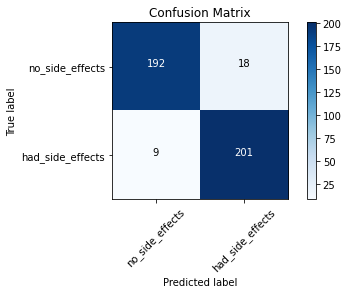

In [26]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Save and Load a Model

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 1. `model.save()`

In [28]:
# check first so see if file already exists.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('./data/medical_trial_model.h5') is False:
    model.save('./data/medical_trial_model.h5')

The save funciton saves:

- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

In [29]:
from tensorflow.keras.models import load_model
new_model = load_model('./data/medical_trial_model.h5')

In [30]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


The model weights, optimizer, etc are the same as the previous one:

In [31]:
new_model.get_weights()

[array([[-0.0497371 , -0.0349154 ,  0.50795746,  0.1944536 ,  0.41503188,
          0.6195742 , -0.4195909 ,  0.6340579 , -0.02015758,  0.37429148,
         -0.19914958, -0.46304855, -0.11812198,  0.72698563, -0.29415265,
          0.24040183]], dtype=float32),
 array([ 0.        ,  0.12797663, -0.26442048,  0.22733383, -0.2167497 ,
        -0.1607651 ,  0.        , -0.31307754,  0.        , -0.19515987,
         0.        ,  0.        ,  0.        , -0.26145416,  0.        ,
         0.13202272], dtype=float32),
 array([[ 1.07045472e-02, -9.31730866e-03,  2.73203224e-01,
         -9.54874754e-02, -1.06944248e-01,  3.26881081e-01,
         -1.46031067e-01,  2.00321764e-01,  2.75579244e-01,
         -2.13044137e-01, -3.61552835e-03,  5.73611856e-02,
          2.36192644e-02,  1.03685290e-01, -2.35677168e-01,
         -3.42370570e-01,  2.96285242e-01, -2.74710804e-01,
         -3.36360931e-01,  1.44532174e-01,  3.27144951e-01,
         -8.41062367e-02, -2.15314671e-01, -1.27913073e-01,
 

In [32]:
new_model.optimizer

#### 2. `model.to_json()`

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the atchitecture only.

In [33]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [34]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [35]:
#model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [36]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 3. `model.save_weights()`

If you only need to save the weights of a model, you can use the following funciton save the weights only.

In [37]:
# check first so see if file already exists.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('./data/my_model_weights.h5') is False:
    model.save_weights('./data/my_model_weights.h5')

In [38]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [39]:
model2.load_weights('./data/my_model_weights.h5')

In [40]:
model2.get_weights()

[array([[-0.0497371 , -0.0349154 ,  0.50795746,  0.1944536 ,  0.41503188,
          0.6195742 , -0.4195909 ,  0.6340579 , -0.02015758,  0.37429148,
         -0.19914958, -0.46304855, -0.11812198,  0.72698563, -0.29415265,
          0.24040183]], dtype=float32),
 array([ 0.        ,  0.12797663, -0.26442048,  0.22733383, -0.2167497 ,
        -0.1607651 ,  0.        , -0.31307754,  0.        , -0.19515987,
         0.        ,  0.        ,  0.        , -0.26145416,  0.        ,
         0.13202272], dtype=float32),
 array([[ 1.07045472e-02, -9.31730866e-03,  2.73203224e-01,
         -9.54874754e-02, -1.06944248e-01,  3.26881081e-01,
         -1.46031067e-01,  2.00321764e-01,  2.75579244e-01,
         -2.13044137e-01, -3.61552835e-03,  5.73611856e-02,
          2.36192644e-02,  1.03685290e-01, -2.35677168e-01,
         -3.42370570e-01,  2.96285242e-01, -2.74710804e-01,
         -3.36360931e-01,  1.44532174e-01,  3.27144951e-01,
         -8.41062367e-02, -2.15314671e-01, -1.27913073e-01,
 

## Convolutional Neural Network (CNN)

The goal is to calssify a set of images to cats and dogs. We are going to use data from the following Kaggle competition [dogs-vs-cats](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data).

*Data Description:* The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [42]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Data preparation

The images included in the `'./data/dogs-vs-cats/` directory are a random subset of the full cat and dog data set from the Kaggle competition.

In [43]:
# Organize data into train, valid, test dirs
os.chdir('../../Image-Classification/data/dogs-vs-cats/train-original')
if os.path.isdir('../train/dog') is False:
    os.makedirs('../train/dog')
    os.makedirs('../train/cat')
    os.makedirs('../valid/dog')
    os.makedirs('../valid/cat')
    os.makedirs('../test/dog')
    os.makedirs('../test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, '../train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, '../train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, '../valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, '../valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c, '../test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, '../test/dog')
        
os.chdir('../../../../CS-Tutorial/Extra')

In [44]:
train_path = '../../Image-Classification/data/dogs-vs-cats/train'
valid_path = '../../Image-Classification/data/dogs-vs-cats/valid'
test_path = '../../Image-Classification/data/dogs-vs-cats/test'

### Some preprocessing

In [45]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [46]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [47]:
imgs, labels = next(train_batches)

In [48]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

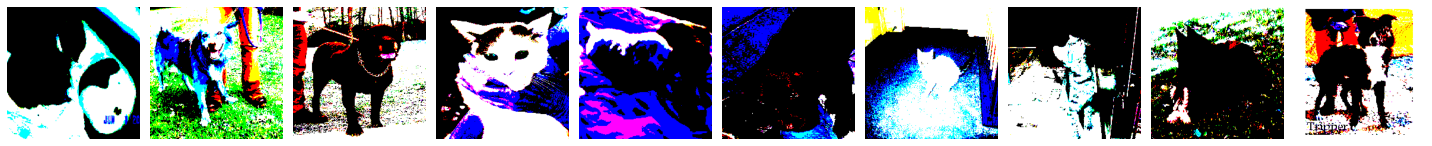

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [49]:
plotImages(imgs)
print(labels)

### Build and train a CNN

- Conv2D: 
    - filters:
    - kernel_size:
    - input_shape: 3 refers to three color channel of RGB format images
- MaxPool2D:
    - pool_size:
    - strides:
- Flatten:

In [50]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [52]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 55s - loss: 15.6141 - accuracy: 0.5460 - val_loss: 9.1180 - val_accuracy: 0.5500
Epoch 2/10
100/100 - 56s - loss: 2.6653 - accuracy: 0.7370 - val_loss: 3.6121 - val_accuracy: 0.6850
Epoch 3/10
100/100 - 59s - loss: 0.6968 - accuracy: 0.8760 - val_loss: 6.2283 - val_accuracy: 0.5450
Epoch 4/10
100/100 - 62s - loss: 0.5260 - accuracy: 0.9050 - val_loss: 3.1178 - val_accuracy: 0.6400
Epoch 5/10
100/100 - 68s - loss: 0.2089 - accuracy: 0.9470 - val_loss: 4.2917 - val_accuracy: 0.6150
Epoch 6/10
100/100 - 75s - loss: 0.1060 - accuracy: 0.9740 - val_loss: 2.8845 - val_accuracy: 0.6400
Epoch 7/10
100/100 - 81s - loss: 0.0856 - accuracy: 0.9780 - val_loss: 4.0238 - val_accuracy: 0.6150
Epoch 8/10
100/100 - 92s - loss: 0.0544 - accuracy: 0.9830 - val_loss: 2.7558 - val_accuracy: 0.7000
Epoch 9/10
100/100 - 82s - loss: 0.0199 - accuracy: 0.9940 - val_loss: 2.8690 - val_accuracy: 0.6450
Epoch 10/10
100/100 - 83s - loss: 5.1240e-04 - accuracy: 1.0000 - val_loss: 2.8429 - val_a

### predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

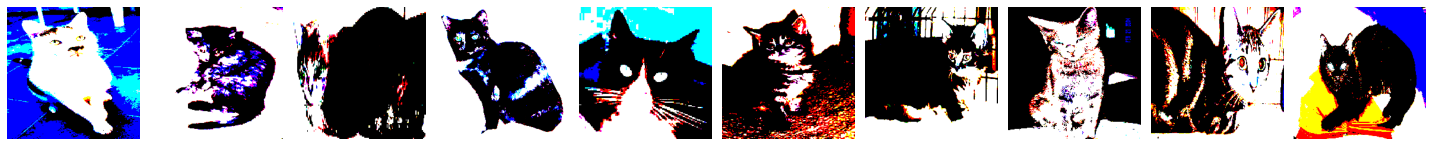

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [54]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [55]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [56]:
predictions = model.predict(x=test_batches, verbose=0)

In [57]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [58]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [59]:
def plot_confusion_matrix(cm, classes, 
                         normalize=False, 
                         title="Confusion_matrix",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalizing can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
        print("")
    else:
        print("")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
test_batches.class_indices

{'cat': 0, 'dog': 1}


[[34 16]
 [11 39]]


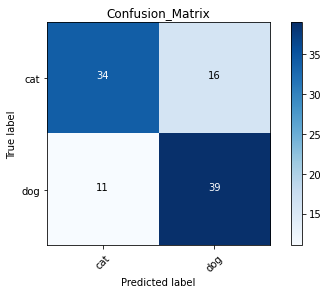

In [61]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion_Matrix')

### Build Fine-tuned VGG16 model

In [62]:
# Download model - Internemt connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [63]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [64]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [65]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [66]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [67]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [69]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [70]:
for layrer in model.layers:
    layer.trainable = False

In [71]:
model.add(Dense(units=2, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [75]:
params = count_params(model)
assert params['non_trainable_params'] == 16_781_312
assert params['trainable_params'] == 117_487_426

### Train the fine-tuned VGG16 model

In [78]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 1379s - loss: 0.5830 - accuracy: 0.7150 - val_loss: 0.7086 - val_accuracy: 0.5650
Epoch 2/5
100/100 - 1462s - loss: 0.5270 - accuracy: 0.7350 - val_loss: 0.4204 - val_accuracy: 0.8100
Epoch 3/5
100/100 - 2395s - loss: 0.3059 - accuracy: 0.8640 - val_loss: 0.3394 - val_accuracy: 0.8600
Epoch 4/5
100/100 - 2471s - loss: 0.2287 - accuracy: 0.9090 - val_loss: 0.3079 - val_accuracy: 0.8750
Epoch 5/5
100/100 - 2484s - loss: 0.1524 - accuracy: 0.9450 - val_loss: 0.2271 - val_accuracy: 0.9050


In [80]:
assert model.history.history.get('accuracy')[-1] > 0.95

AssertionError: 

### Predict using fine-tuned VGG16 model

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
text_batches.classes

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y+pred=np.argmax(predictions, axis=-1))

In [ ]:
test_batches.class_indices

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# MobileNet

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline